# 项目名称：TMDb电影数据分析

### 项目目的：
通过对TMDb的电影数据进行分析，得出电影相关问题的答案

### 项目过程： 
1、观察原始数据并提出问题 2、载入数据 3、评估数据，包括 每个数据集中的样本数 每个数据集中的列数 每个数据集中重复的行数 列的数据类型 具有缺失值的特征 每个数据集中特征的非空唯一值的数量 这些唯一值都是什么，以及每个的计数 4、整理数据 5、数据清理 6、根据问题进行分析 7、可视化数据 8、整理数据图 9、得出结论

In [33]:
#导入数据准备进行分析
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [34]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


根据需要研究的问题，得知不需要的数据为"cast"、"keywords"、"homepage"、"director"、"tagline"、"overview"、"genres"、"production_companies"，并且id与imdb_id并不能在分析过程中起到标示的作用，因此首先要将这几个数据删掉。

In [35]:
#删掉不需要的数据
df.drop(['id' ,'imdb_id' , 'cast' , 'keywords' , 'homepage' , 'director' , 'tagline' , 'overview' , 'genres' , 'production_companies'] , axis = 1 , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 933.9+ KB


可以看到新的数据表中没有缺失值。考虑到本数据表内容有预算、收入、时间、标签、播放量等可重复出现的数据，因此在删除重复行之后只对电影名称进行查重与过滤。

In [36]:
#找到数据中的重复数据个数
df['original_title'].duplicated().sum()

295

重建删除重复行之后的表格

In [37]:
#删除重复数据
df.drop_duplicates('original_title' , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10571 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10571 non-null float64
budget            10571 non-null int64
revenue           10571 non-null int64
original_title    10571 non-null object
runtime           10571 non-null int64
release_date      10571 non-null object
vote_count        10571 non-null int64
vote_average      10571 non-null float64
release_year      10571 non-null int64
budget_adj        10571 non-null float64
revenue_adj       10571 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 991.0+ KB


问题1:投资预算与收入是否相关？此问题将通过对budget_adj和revenue_adj两组数据的研究进行分析。

In [38]:
#找出两组数据的最大值
df['budget_adj'].max()

425000000.0

In [39]:
df['revenue_adj'].max()

2827123750.41189

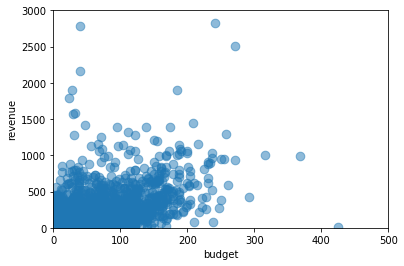

In [40]:
#根据散点图找到两组数据的相关性。这里由于每个数据的数字太大，因此将小数点向左移动六位之后再计算
%matplotlib inline
x = (df['budget_adj'] / 1000000).tolist()
y = (df['revenue_adj'] / 1000000).tolist()
plt.scatter(x , y , s = 75 , alpha = 0.5)
plt.xlim((0 , 500))
plt.ylim(0 , 3000)
plt.xlabel('budget')
plt.ylabel('revenue')
plt.show()

可以从图中看到两组数据有一定的相关性，但相关性并不强。也就是说明，即使投资预算不大，也有可能排出收入很高的电影。

问题2:哪一年的电影平质量最高？这里我们根据评分来判断电影质量。根据烂番茄与豆瓣的评分机制大概可以知道，评分比票房更能反映出电影的质量。

In [59]:
#查看网站的电影年代分布
year = df['release_year'].unique()
year = year[np.argsort(year)]
year

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

In [60]:
#根据年代计算平均值
df_avg = df.groupby('release_year').mean()
df_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,
1960,0.368835,3.320000e+05,2.120200e+06,106.560000,35.360000,6.176000,2.447825e+06,1.563217e+07
1961,0.442715,1.640607e+06,1.199001e+07,121.357143,83.428571,6.346429,1.196800e+07,8.746543e+07
1962,0.430630,1.742142e+06,7.433788e+06,123.965517,72.827586,6.279310,1.255814e+07,5.358608e+07
1963,0.510663,2.528672e+06,6.087134e+06,112.862069,86.655172,6.300000,1.800460e+07,4.334148e+07
1964,0.415003,9.630039e+05,8.316629e+06,108.512195,74.926829,6.202439,6.770175e+06,5.846812e+07
1965,0.314955,1.653092e+06,1.018706e+07,115.852941,49.823529,6.173529,1.144033e+07,7.050018e+07
1966,0.311006,1.337548e+06,2.017540e+06,106.047619,31.047619,6.135714,8.985665e+06,1.355386e+07
1967,0.380738,1.877291e+06,1.374989e+07,104.171429,57.028571,6.277143,1.227141e+07,8.987981e+07
1968,0.450295,1.675400e+06,5.655489e+06,106.485714,91.314286,6.328571,1.050302e+07,3.545406e+07


In [61]:
#根据柱状图得出最受欢迎电影是哪一年上映的
#获取平均分最大值与最小值
df_avg['vote_average'].max()

6.7340425531914905

In [62]:
df_avg['vote_average'].min()

5.795555555555555

In [63]:
df_avg['vote_average']

release_year
1960    6.176000
1961    6.346429
1962    6.279310
1963    6.300000
1964    6.202439
1965    6.173529
1966    6.135714
1967    6.277143
1968    6.328571
1969    5.926667
1970    6.358974
1971    6.400000
1972    6.520000
1973    6.734043
1974    6.426190
1975    6.387179
1976    6.309524
1977    6.167857
1978    6.096610
1979    6.333962
1980    6.141429
1981    6.200000
1982    6.218421
1983    6.007595
1984    5.974227
1985    6.164762
1986    5.992241
1987    6.109322
1988    5.954286
1989    6.077099
1990    5.992683
1991    5.993023
1992    6.081102
1993    6.041860
1994    5.941758
1995    6.063314
1996    5.866842
1997    5.985638
1998    5.978283
1999    6.030594
2000    5.881982
2001    5.893305
2002    5.966667
2003    5.939068
2004    5.991333
2005    5.865634
2006    5.947870
2007    5.959102
2008    5.928195
2009    5.851803
2010    5.993210
2011    5.958835
2012    5.795556
2013    5.881202
2014    5.923782
2015    5.885692
Name: vote_average, dtype: float64

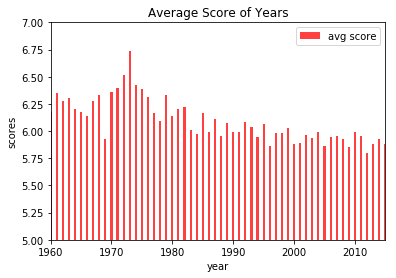

In [64]:
#得出两组数据的柱状图
width = 0.35
score = df_avg['vote_average']
plt.bar(year , score , width , color = 'r' , alpha = 0.75 , label = 'avg score')
plt.xlabel('year')
plt.ylabel('scores')
plt.xlim(1960 , 2015)
plt.ylim(5 , 7)
plt.title('Average Score of Years')
plt.legend()

In [65]:
df_avg['vote_average']

release_year
1960    6.176000
1961    6.346429
1962    6.279310
1963    6.300000
1964    6.202439
1965    6.173529
1966    6.135714
1967    6.277143
1968    6.328571
1969    5.926667
1970    6.358974
1971    6.400000
1972    6.520000
1973    6.734043
1974    6.426190
1975    6.387179
1976    6.309524
1977    6.167857
1978    6.096610
1979    6.333962
1980    6.141429
1981    6.200000
1982    6.218421
1983    6.007595
1984    5.974227
1985    6.164762
1986    5.992241
1987    6.109322
1988    5.954286
1989    6.077099
1990    5.992683
1991    5.993023
1992    6.081102
1993    6.041860
1994    5.941758
1995    6.063314
1996    5.866842
1997    5.985638
1998    5.978283
1999    6.030594
2000    5.881982
2001    5.893305
2002    5.966667
2003    5.939068
2004    5.991333
2005    5.865634
2006    5.947870
2007    5.959102
2008    5.928195
2009    5.851803
2010    5.993210
2011    5.958835
2012    5.795556
2013    5.881202
2014    5.923782
2015    5.885692
Name: vote_average, dtype: float64

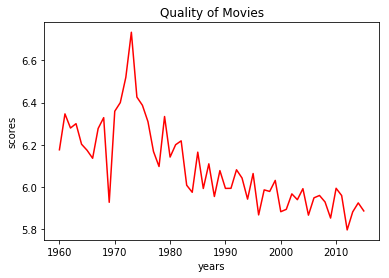

In [66]:
#得出两组数据的折线图
plt.plot(score , 'r' , label = 'scores changes')
plt.xlabel('years')
plt.ylabel('scores')
plt.title('Quality of Movies')
plt.show()

回答：从以上两图可以看出，电影质量最高的一年是在1973年，这年的电影平均分最高。而电影的质量在这几年虽然有些摆动的厉害，但总体而言是在下降的。

问题3:评分越高的电影是否越受欢迎？

In [46]:
#找到两组数据的最大值
df['popularity'].max()

32.985763

In [44]:
df['vote_average'].max()

9.2

In [ ]:
df['popuarity']

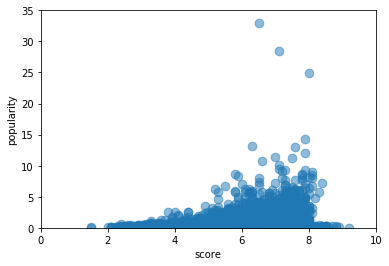

In [48]:
#为了研究两组数据的相关性，这里还用散点图来表示
x = df['vote_average']
y = df['popularity']
plt.scatter(x , y , s = 75 , alpha = 0.5)
plt.xlim(0 , 10)
plt.ylim(0 , 35)
plt.xlabel('score')
plt.ylabel('popularity')
plt.show()

回答：从上图可以看出，电影的评分与播放量具有一定的相关性，大部分情况下评分越高的电影播放量越高。但是还有一种情况，可以看到得分超过8分的电影播放量非常低。受到数据的限制，我们无法知道这些电影是由于参与评分的人数少导致评分过高，还是因为这些是小众文艺电影所以虽然质量不错但是受众群不广。

结论：根据对imdb所给出的电影数据分析，我们可以知道：电影的质量可能会受到预算的影响，但是就算是小成本电影，依然可以得到市场的认可，收获很高的票房；电影的质量并不是稳定的，经常在一些时间段内出现剧烈的摆动，并且总体而言质量在下降；一般情况下，评分高的电影会得到更的播放量，但是一些评分特别高的电影，却播放量非常少，究竟是什么原因使得这些高分电影的播放量低，在数据中暂时还不能体现，而评分和播放量两者之间具体的关系，暂时也不能知道。